# Importing libraries


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np 
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# Import the dataset as df

In [4]:

for dirname, _, filenames in os.walk("C:/Users/skrbg/OneDrive/Desktop/winequality-red.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df=pd.read_csv("C:/Users/skrbg/OneDrive/Desktop/winequality-red.csv",delimiter=';')
df.sample(frac=1).reset_index(drop=True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Head, tail, shape and sample  of the dataset

In [5]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [6]:
df.shape

(1599, 12)

In [7]:
display(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# summary of the dataset

In [9]:
df.describe() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
df.duplicated().sum()

240

In [11]:
df.drop_duplicates(inplace=True)
df.shape

(1359, 12)

# Data visualization

In [12]:
df.quality.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

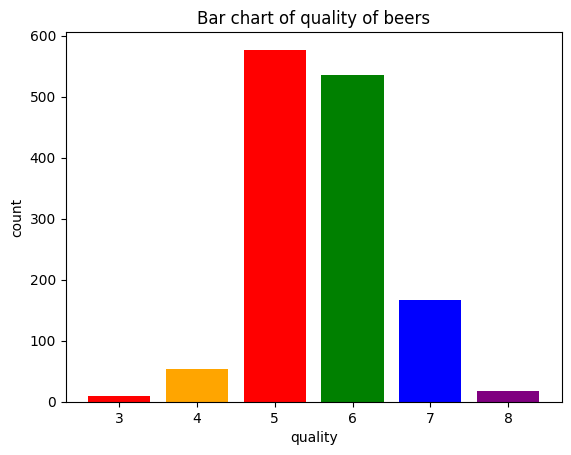

In [13]:
quality_count=df['quality'].value_counts()
colors=['red', 'green', 'blue', 'orange', 'purple']
plt.bar(quality_count.index,quality_count.values,color=colors)
plt.xlabel('quality')
plt.ylabel('count')
plt.title("Bar chart of quality of beers")


plt.show()




In [14]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


<AxesSubplot: >

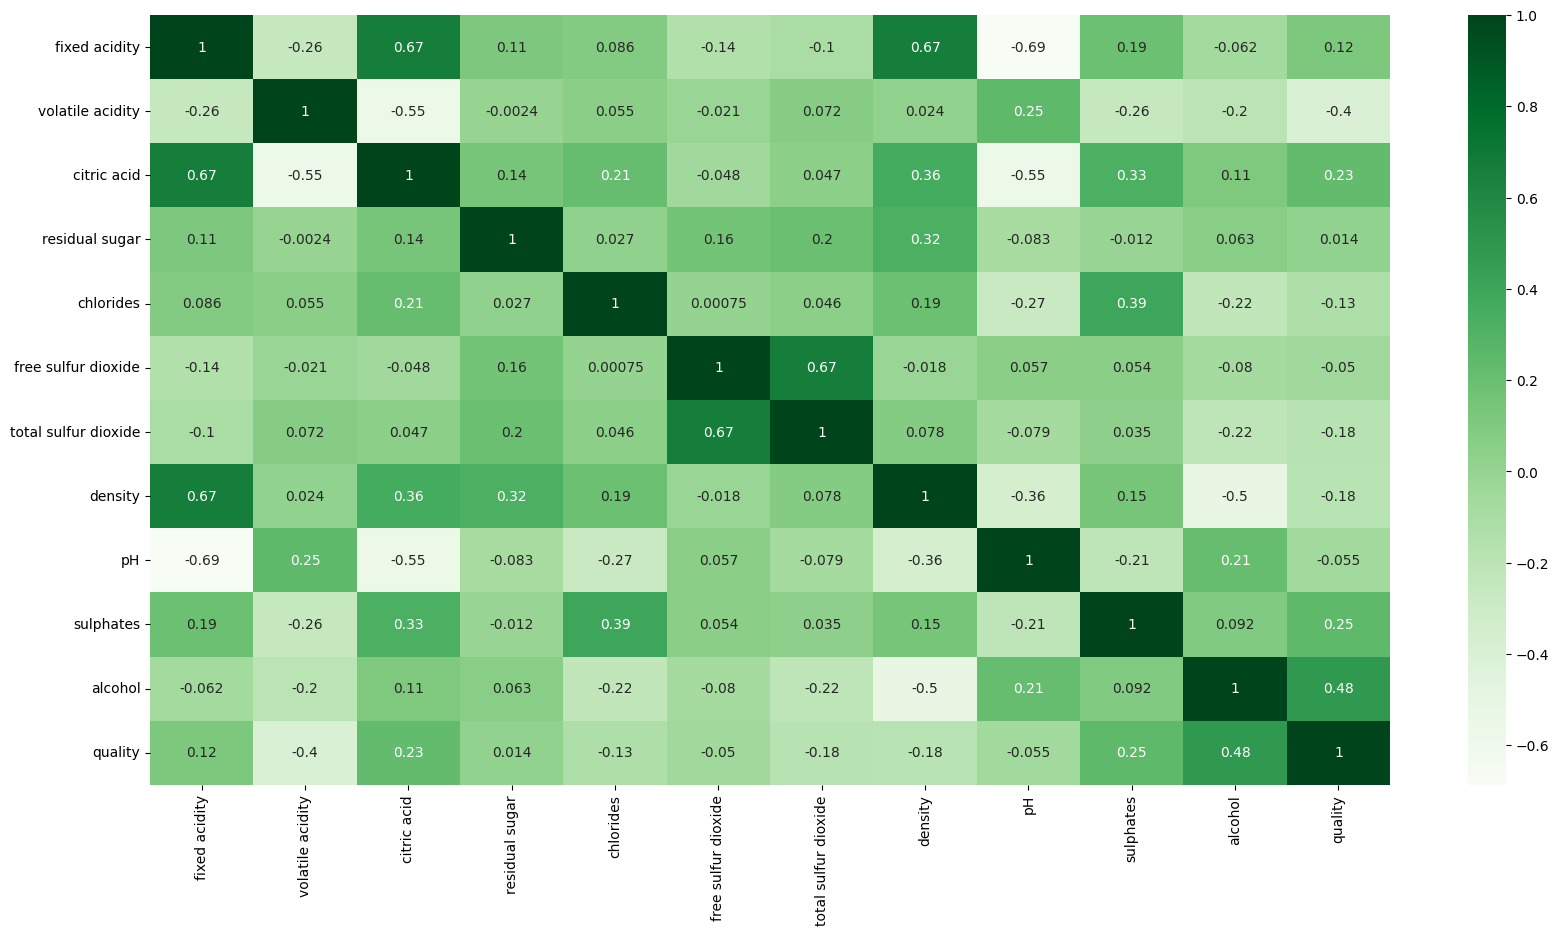

In [15]:
corr = df.corr()
plt.figure(figsize=(20,10))
sb.heatmap(corr,annot=True ,cmap='Greens')

# Feature scaling

In [16]:
# standard scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_res = sc.fit_transform(df)

In [17]:
x_res

array([[-0.52443096,  0.93200015, -1.39325797, ..., -0.57856134,
        -0.95437429, -0.7570404 ],
       [-0.29406274,  1.91580043, -1.39325797, ...,  0.12482157,
        -0.5845748 , -0.7570404 ],
       [-0.29406274,  1.25993358, -1.18861732, ..., -0.05102416,
        -0.5845748 , -0.7570404 ],
       ...,
       [-1.38831178,  0.11216658, -0.88165635, ...,  0.59374351,
         0.7097234 ,  0.45762065],
       [-1.38831178,  0.63139451, -0.77933603, ...,  0.3006673 ,
        -0.21477532, -0.7570404 ],
       [-1.33071973, -1.19956712,  1.01126962, ...,  0.00759108,
         0.52482366,  0.45762065]])

In [20]:
##VIF stands for Variance Inflation Factor
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each column in the DataFrame
vif = pd.DataFrame()
vif["Feature"] = df.columns
vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

# Display the VIF DataFrame
print(vif)








                 Feature          VIF
0          fixed acidity    75.023033
1       volatile acidity    17.387181
2            citric acid     9.195827
3         residual sugar     4.915782
4              chlorides     6.440176
5    free sulfur dioxide     6.442192
6   total sulfur dioxide     6.601411
7                density  1547.276977
8                     pH  1102.707051
9              sulphates    22.810607
10               alcohol   146.378710
11               quality    74.885884


In [21]:
columns_to_drop = ['density', 'fixed acidity', 'volatile acidity', 'citric acid', 'total sulfur dioxide', 'alcohol']
X1 = df.drop(columns_to_drop, axis=1)
X1.shape

(1359, 6)

In [22]:
X1

,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,quality
0,1.9,0.076,11.0,3.51,0.56,5
1,2.6,0.098,25.0,3.20,0.68,5
2,2.3,0.092,15.0,3.26,0.65,5
3,1.9,0.075,17.0,3.16,0.58,6
5,1.8,0.075,13.0,3.51,0.56,5
...,...,...,...,...,...,...
1593,1.9,0.068,28.0,3.42,0.82,6
1594,2.0,0.090,32.0,3.45,0.58,5
1595,2.2,0.062,39.0,3.52,0.76,6
1597,2.0,0.075,32.0,3.57,0.71,5


In [50]:
##Putting values in x and y

In [26]:
x = np.array(X1.loc[:, X1.columns != 'quality'])
y=np.array(X1['quality'])


In [28]:
##Training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=1)

print(x_train.shape, x_test.shape)

(1223, 5) (136, 5)


In [31]:

LinearRegression().fit(x_train, y_train)

LinearRegression()

In [38]:
# Set the number of epochs

# Set the number of epochs
num_epochs = 10

# Train the model for the specified number of epochs
for epoch in range(num_epochs):
    # Fit the model to the training data
    regression_model.fit(x_train, y_train)
    
    # Evaluate the model on the testing data
    y_predict = regression_model.predict(x_test)
    y_predict = np.round(y_predict)
    
    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_predict)
    
    # Print the results for each epoch
    print(f"Epoch {epoch+1} - Mean Squared Error: {mse}")

# Final evaluation on the testing data after training
final_predictions = regression_model.predict(x_test)
final_predictions = np.round(final_predictions)
final_mse = mean_squared_error(y_test, final_predictions)
print(f"Final Mean Squared Error: {final_mse}")

Epoch 1 - Mean Squared Error: 0.5588235294117647
Epoch 2 - Mean Squared Error: 0.5588235294117647
Epoch 3 - Mean Squared Error: 0.5588235294117647
Epoch 4 - Mean Squared Error: 0.5588235294117647
Epoch 5 - Mean Squared Error: 0.5588235294117647
Epoch 6 - Mean Squared Error: 0.5588235294117647
Epoch 7 - Mean Squared Error: 0.5588235294117647
Epoch 8 - Mean Squared Error: 0.5588235294117647
Epoch 9 - Mean Squared Error: 0.5588235294117647
Epoch 10 - Mean Squared Error: 0.5588235294117647
Final Mean Squared Error: 0.5588235294117647
